## EDA (EXPLORATORY DATA ANALYSIS)

1. Load dataset

2. Clean data(missing values, duplicates, types)

3.  treat outliers(the points not at all relate to the data)

4.  Univariate & Bivariate and multivariate analysis

5.  insights

### Outlier:
            A Data point that is significantly different from other observations in a dataset.
        
### How outliers will come ??
1. Measurement errors.

2. Data entry mistakes.

### why they are important ? 
1.They can be errors.

2.They effect the data analysis.

### How to Identify the outliers ?
1.Statistical Methods.

-----> Interquartile Range (IQR)

-----> Z-Score

2.Visualization Techniques.

-----> Box Plots

-----> Scatter Plots

-----> Histograms

### Univariate Analysis 

- A method that analyzes a single variable to describe its characteristics, find patterns and summarize the data.

- It invloves only one variable.

### Bivariate Analysis

- It will give the relationship between the 2 variables.

- It helps to find is there is an any corelation, association or connection between the 2 variables.

- It involves 2 variables (x & y)

### Multivariate Analysis

- To Understand how multiple factors interact & influence each other .

- It involves more than 2 variables

Example :- 
How our age, income, and education level together influence the purchasing behaviour.


### ETL

### ELT

### EDA : < DataSet >

1. Load and Overview

2. Clean the dataset (missing values, duplicates, dtypes)

3. Univariate, Bivariate and Mulivariate Analysis

4. Outliers -IQR

5. Feature Engineering

6. Key Insights

#### Feature Engineering : 
    It is a process of turning raw data into useful features that helps to improve the performance of ML models.

# 1.Load Libraries and dataset

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Basic Information and overview
print('Shape of the dataset : ',df.shape)
print('\n Data Info : \n')
df.info()

# Summary Statistics 
df.describe()

Shape of the dataset :  (891, 15)

 Data Info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2.Cleaning the dataset

In [12]:
# Missing values analysis

missing = pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})

missing.sort_values(by='missing_percent', ascending=False)

,missing_count,missing_percent
embark_town,2,0.224467
survived,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
pclass,0,0.000000
parch,0,0.000000
fare,0,0.000000
class,0,0.000000
embarked,0,0.000000


In [ ]:
# Handling the missing values

# Fill the numeric missing values with their mean value

df['age'] = df['age'].fillna(df['age'].mean())

# Fill categorical missing values with mode (most repeating value)

df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# drop deck column  since it have too many missing values

df.drop(columns=['deck'],inplace=True) #run only once or else you will get error since already you dropped that column it once

print('Missing values after cleaning : \n',df.isnull().sum().sum())

Missing values after cleaning : 
 2


In [15]:
missing = pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})

missing.sort_values(by='missing_percent', ascending=False)

,missing_count,missing_percent
embark_town,2,0.224467
survived,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
pclass,0,0.000000
parch,0,0.000000
fare,0,0.000000
class,0,0.000000
embarked,0,0.000000


#### Insight : 

- we filled important columns and removed highly missing ones.

- This keeps maximum information while making the dataset clean.

In [18]:
# Duplicates and Data Type Check 

print('Duplicate rows :', df.duplicated().sum())

# Convert some columns to category type

df['class'] = df['class'].astype('category')
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')

df.info()

Duplicate rows : 111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


# 3. i.Univariate Analysis for Numerical features

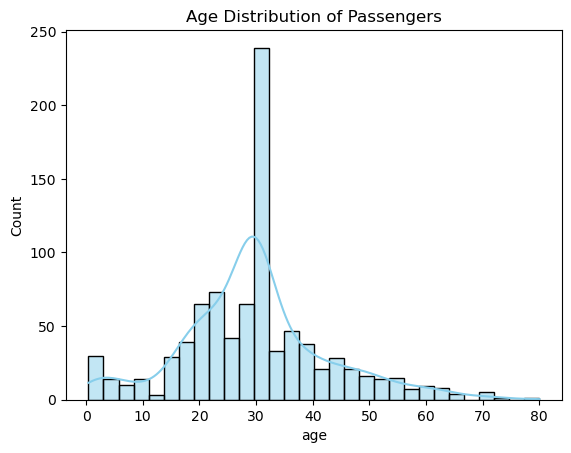

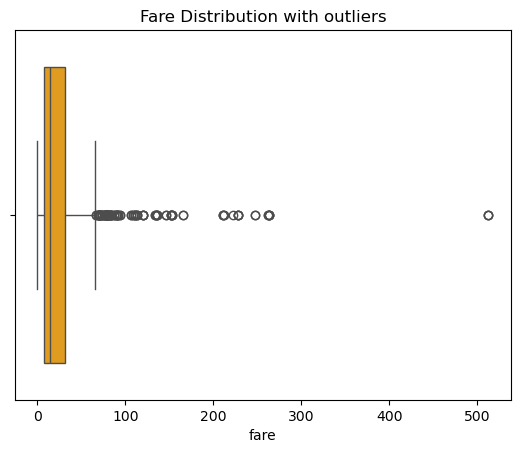

In [ ]:
# Univariate Analysis for Numerical Features

num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()

# Histogram :Age
sns.histplot(df['age'],bins=30,kde=True,color='skyblue')
plt.title("Age Distribution of Passengers")
plt.show()

# Boxplot :Fare
sns.boxplot(x=df['fare'],color='orange')
plt.title("Fare Distribution with outliers")
plt.show()

# 3. ii.Univariate Analysis for Categorical Features

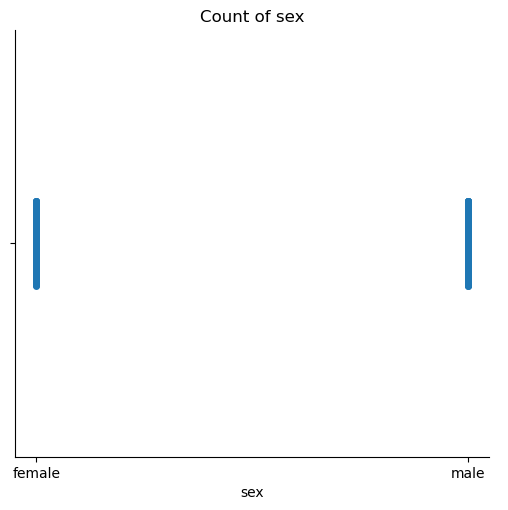

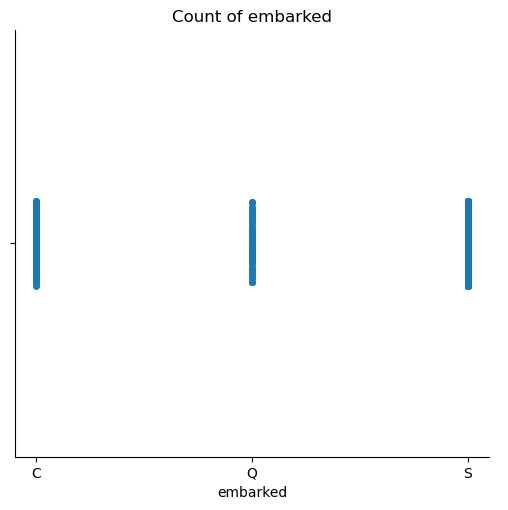

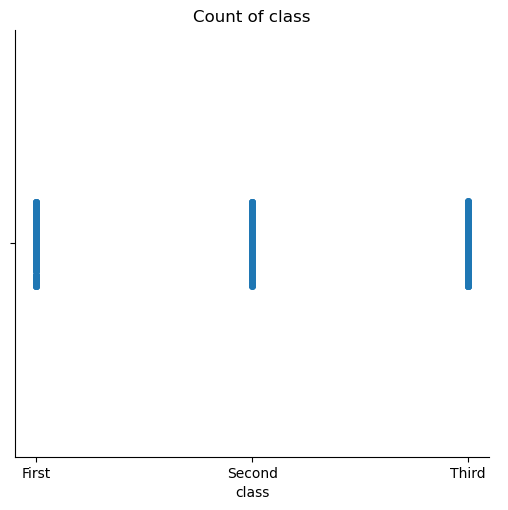

In [21]:
# Univariate Analysis for Categorical Features

cat_clos = df.select_dtypes('category').columns

for col in cat_clos:
    sns.catplot(x=col,data=df)
    plt.title(f"Count of {col}")
    plt.show()

# 3. iii.Bivariate Analysis for Numerical Features

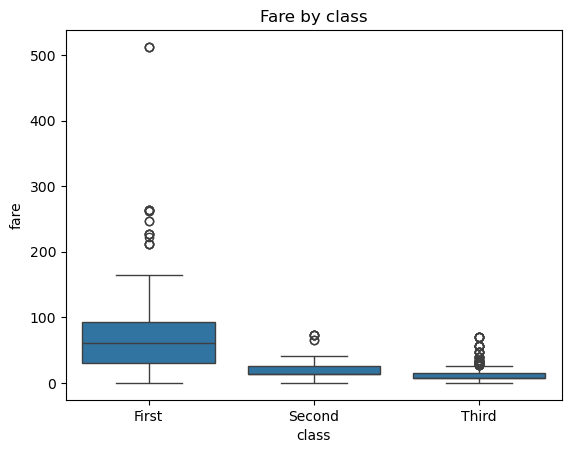

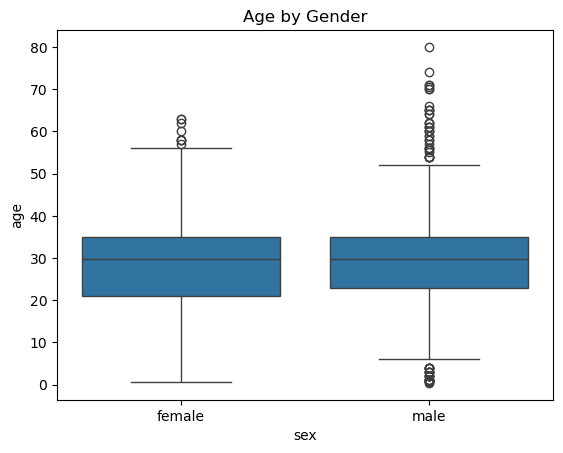

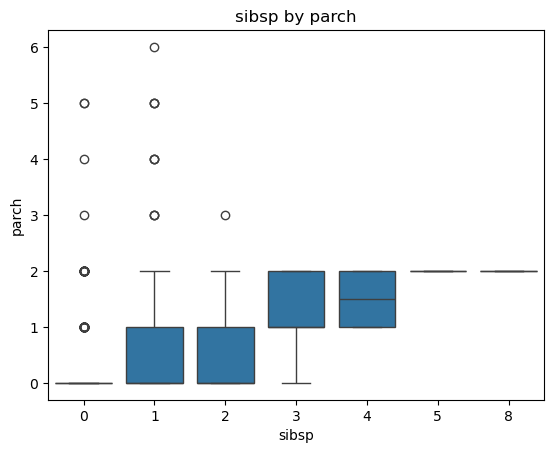

In [ ]:
sns.boxplot(x='class',y='fare',data=df)
plt.title("Fare by class")
plt.show()

sns.boxplot(x='sex',y='age',data=df)
plt.title("Age by Gender")
plt.show()

sns.boxplot(x='sibsp',y='parch',data=df)  # sibsp acts x coordinate and parch acts as y coordinate
plt.title("sibsp by parch")
plt.show()

# 3. iii.Bivariate Analysis for Categorical Features

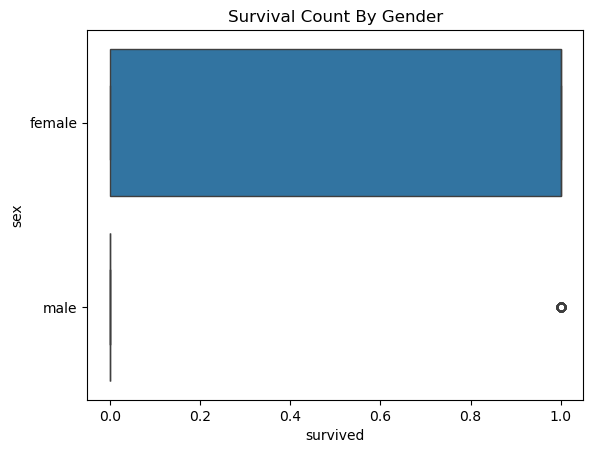

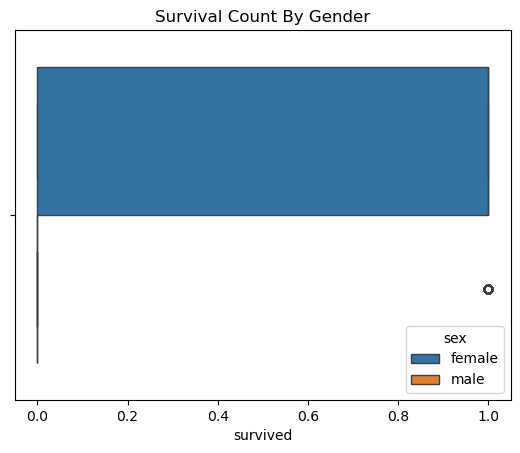

In [ ]:
# Bivariate Analysis   Categorical vs Categorical

sns.boxplot(x='survived', y='sex',data=df)
plt.title('Survival Count By Gender')
plt.show()
# data = df says to seaborn like df is the dataset for plotting
sns.boxplot(x='survived', hue='sex',data=df)
plt.title('Survival Count By Gender')
plt.show()

# 3. iv.Corelation and multivariate analysis

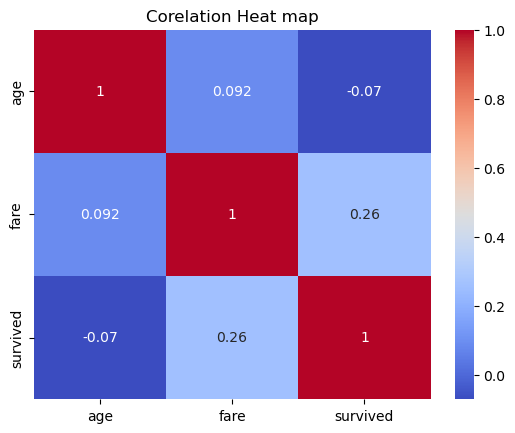

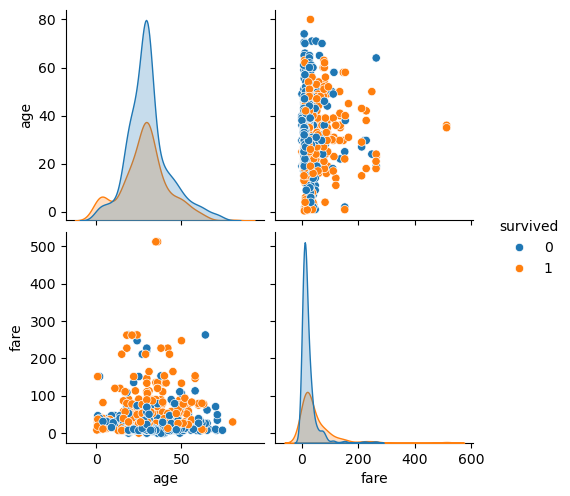

In [31]:
# Corelation and multivariate analysis
corr = df[['age','fare','survived']].corr()
sns.heatmap(corr,annot= True ,cmap='coolwarm')
plt.title("Corelation Heat map")
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()

#### Insights:
1. Fare has a positive corelation with survival

2. Age shows slightly negative corelation with survival


# 4.Outliers Detection using IQR

Number of outliers :  891


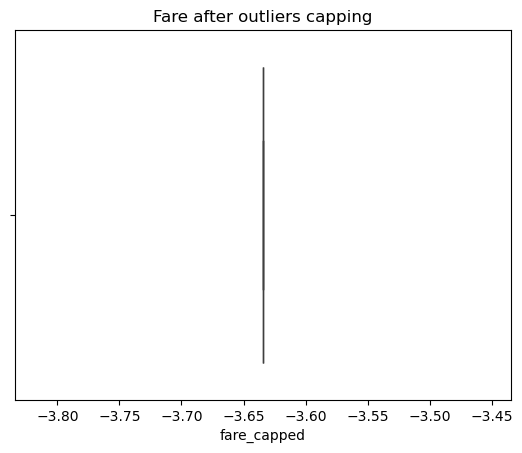

In [37]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)

IQR = Q3-Q1

lower = Q1 - 1.5 * IQR
upper = Q3 - 1.5 * IQR

outliers = df[(df['fare'] < lower) | (df['fare'] > upper)]
print("Number of outliers : ",len(outliers))

df['fare_capped'] = df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("Fare after outliers capping")
plt.show()

# 5.Feature Engineering

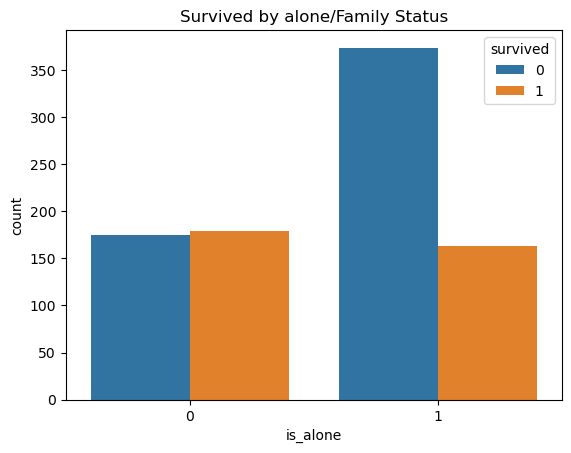

In [43]:
# Feature engineering

# create new features

df['family_size'] = df['sibsp'] + df['parch'] + 1

df['is_alone'] = (df['family_size'] == 1).astype(int)

sns.countplot(x='is_alone',hue='survived',data=df)
plt.title("Survived by alone/Family Status")
plt.show()


# 6.Exporting Data

In [ ]:
# Export the cleaned data

df.to_csv("Titanic_cleaned.csv",index=False)
print('\n Cleaned Titanic Data Saved as titanic_cleaned.csv')



 Cleaned Titanic Data Saved as titanic_cleaned.csv


In [47]:
import os
print(os.getcwd())

c:\Users\srini\OneDrive\Desktop\dataAnalysis
